In [54]:
import pandas as pd
import csv
import os
import numpy as np
import datetime
from xlsxwriter.workbook import Workbook
from xlsxwriter import Workbook
import time
from scipy import integrate, stats
import matplotlib.pyplot as plt
from functools import reduce
import re
from sklearn import preprocessing

# %matplotlib inline

In [2]:
Working_dir = os.getcwd()
Data_dir = os.path.join(Working_dir, 'Raw data')
Data_prep_dir = os.path.join(Working_dir, 'Preprocessed data')
Output_dir = os.path.join(Working_dir, 'Analysis')
Plots_dir = os.path.join(Output_dir, 'Plots')

In [3]:
nodes_file_names = ['May2018_idle.csv' , 'June2018_idle.csv', 'July2018_idle.csv', \
                    'September2018.csv', 'October2018.csv', 'November2018.csv', \
                    'December2018.csv' , 'January2019.csv']
nodes_df_names = [item.split('.')[0] for item in nodes_file_names]

## Pie-charts with energy portions used by CPU, memory and other sources

In [10]:
def plot_energy_cons(data, node, month, year, avg_flag=False):
    labels = 'CPU', 'Memory', 'Other'
    data = data.values
    colors = ['lightskyblue', 'lightcoral',  'yellowgreen']# 'gold', 
    
    fig1, ax1 = plt.subplots()
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
    plt.axis('equal')
    if not avg_flag:
        plt.title(month + ' ' + year + ', Node '+ node)
        fig1.savefig(os.path.join( Output_dir, 'Plots', 'Node_' + node + '_' + month + '_' + year + '.png' ) )
    else:
        plt.title(month + ' ' + year)
        fig1.savefig(os.path.join( Plots_dir, 'Avg_' + month + '_' + year + '.png' ) )
        plt.show()

In [5]:
nodes_df_dict = {}
for file_name, df_name in zip(nodes_file_names, nodes_df_names):
    nodes_df_dict[df_name] = pd.read_csv(os.path.join( Output_dir, 'nodes_stats_' + file_name), \
                                         delimiter=";", header=0, index_col=0)
    to_drop_ix = np.unique(np.append(\
                                     np.where(nodes_df_dict[df_name].loc["dcenergy_error_percent", :].isna())[0], \
                                     np.where(nodes_df_dict[df_name].loc["dcenergy_error_percent", :] > 5.)[0]))
    to_drop = nodes_df_dict[df_name].iloc[:,to_drop_ix].columns.values
    nodes_df_dict[df_name].drop(columns=to_drop, inplace=True)

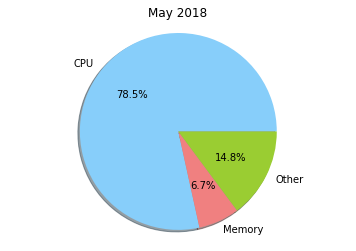

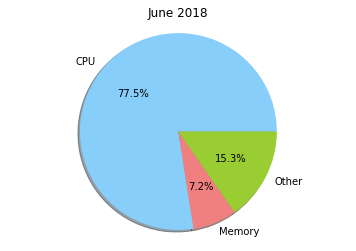

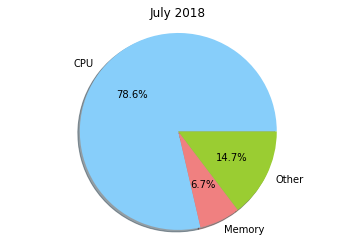

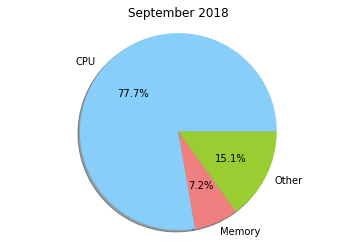

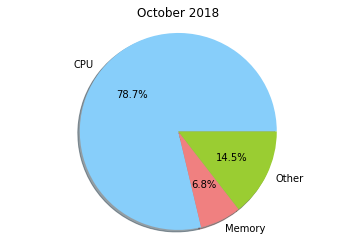

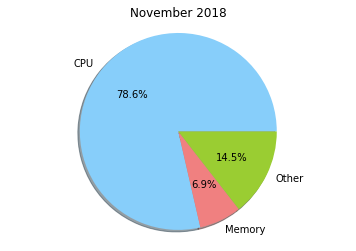

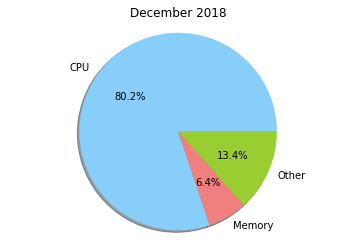

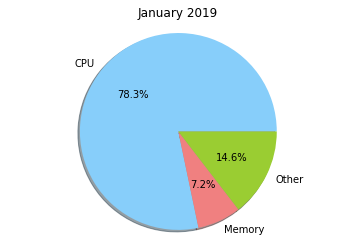

In [6]:
for df_name in nodes_df_names:
    year = re.findall(r'\d+', df_name)[0]
    month = df_name.split(year)[0]
#     for node in nodes_df_dict[df_name].columns.values:
#         plot_energy_cons(data=nodes_df_dict[df_name][node][5:8], \
#                          node=str(int(node.split('x')[1])), \
#                          month=month, year=year)
    plot_energy_cons(data=nodes_df_dict[df_name].iloc[5:8,:].mean(axis=1), \
                     node='', \
                     month=month, year=year, avg_flag=True)
    

## Temperature, fans speed and CPU power trends - September

In [13]:
nodes_stats_Sept = pd.read_csv(os.path.join( Output_dir, 'nodes_stats_September2018.csv'), \
                                         delimiter=";", header=0, index_col=0)
to_drop_ix = np.unique(np.append(\
                                     np.where(nodes_stats_Sept.loc["dcenergy_error_percent", :].isna())[0], \
                                     np.where(nodes_stats_Sept.loc["dcenergy_error_percent", :] > 5.)[0]))
to_drop = nodes_stats_Sept.iloc[:,to_drop_ix].columns.values
node_df_Sept = pd.read_csv(os.path.join( Data_prep_dir, 'September2018.csv'), \
                                         delimiter=";", header=0)
for node in to_drop:
    node_df_Sept.drop(index=node_df_Sept[node_df_Sept.nodename == node].index)
    
node_Sept = node_df_Sept[node_df_Sept.nodename == node_df_Sept.nodename.unique()[10]]
node_Sept_norm = node_Sept.copy()

### Normalize and recheck

In [58]:
# node_Sept = node_df_Sept[node_df_Sept.nodename == node_df_Sept.nodename.unique()[10]]
# # node_Sept['cpu_power', 'cpu1_temp', 'cpu2_temp'] = preprocessing.normalize(node_Sept['cpu_power', 'cpu1_temp', 'cpu2_temp'])
# plt.plot('timestamp_measure', 'cpu_power', data=node_Sept, label='CPU power sensor')
# plt.plot('timestamp_measure', 'cpu1_temp', data=node_Sept, label='CPU1 temp')
# plt.plot('timestamp_measure', 'cpu2_temp', data=node_Sept, label='CPU2 temp')
# plt.legend()
# plt.show()

In [62]:
node_Sept_norm[['cpu_power', 'cpu1_temp', 'cpu2_temp', 'exh_temp']] = \
    preprocessing.normalize(node_Sept[['cpu_power','cpu1_temp', 'cpu2_temp', 'exh_temp']].values, norm='max', axis=0)

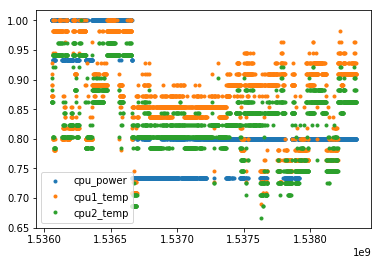

In [26]:
plt.plot('timestamp_measure', 'cpu_power', data=node_Sept_norm, label='cpu_power', linestyle='', marker='.')
plt.plot('timestamp_measure', 'cpu1_temp', data=node_Sept_norm, label='cpu1_temp', linestyle='', marker='.')
plt.plot('timestamp_measure', 'cpu2_temp', data=node_Sept_norm, label='cpu2_temp', linestyle='', marker='.')
plt.legend()
plt.show()

## Fans

c:\users\aagri\appdata\local\programs\python\python35\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


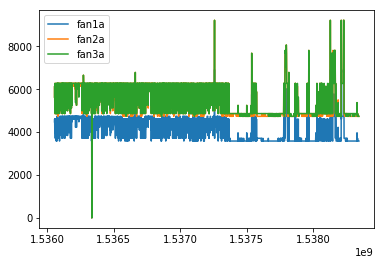

In [56]:
plt.plot('timestamp_measure', 'fan1a', data=node_Sept_norm, label='fan1a')
plt.plot('timestamp_measure', 'fan2a', data=node_Sept_norm, label='fan2a')
plt.plot('timestamp_measure', 'fan3a', data=node_Sept_norm, label='fan3a')
plt.legend()
plt.show()

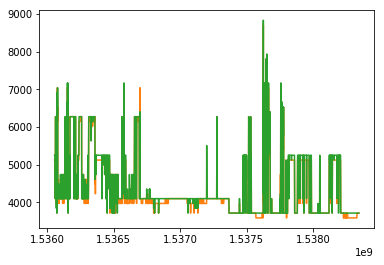

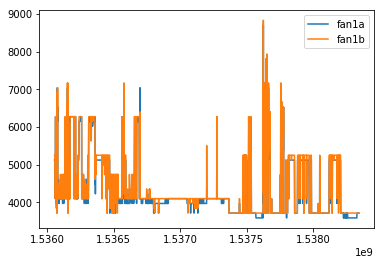

In [70]:
plt.plot('timestamp_measure', 'fan1a', data=node_Sept, label='fan1a')
plt.plot('timestamp_measure', 'fan1b', data=node_Sept, label='fan1b')
plt.legend()
plt.show()

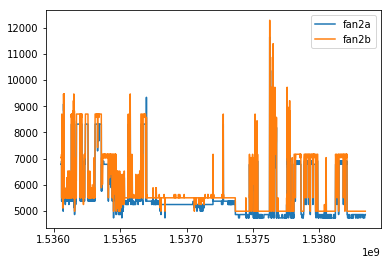

In [65]:
plt.plot('timestamp_measure', 'fan2a', data=node_Sept, label='fan2a')
plt.plot('timestamp_measure', 'fan2b', data=node_Sept, label='fan2b')
plt.legend()
plt.show()

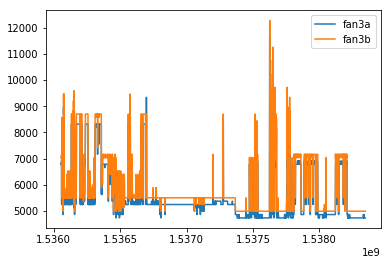

In [66]:
plt.plot('timestamp_measure', 'fan3a', data=node_Sept, label='fan3a')
plt.plot('timestamp_measure', 'fan3b', data=node_Sept, label='fan3b')
plt.legend()
plt.show()

## Distance between CPU temperature and CPU power utilization

c:\users\aagri\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


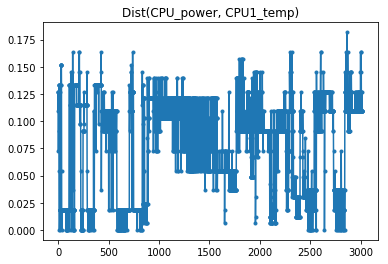

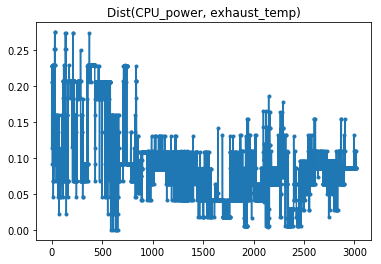

In [63]:
plt.plot(abs(node_Sept_norm.cpu_power[:] - node_Sept_norm.cpu1_temp[:]).values, \
         linestyle='-', marker='.')
plt.title('Dist(CPU_power, CPU1_temp)')
plt.legend()
plt.show()

plt.plot(abs(node_Sept_norm.cpu_power - node_Sept_norm.exh_temp).values, \
         linestyle='-', marker='.')
plt.title('Dist(CPU_power, exhaust_temp)')
plt.legend()
plt.show()

### Pearson correlation coefficient

In [57]:
print(stats.pearsonr(node_Sept_norm.cpu_power, node_Sept_norm.cpu1_temp), \
      stats.pearsonr(node_Sept_norm.cpu_power, node_Sept_norm.cpu2_temp), \
      stats.pearsonr(node_Sept_norm.cpu_power, node_Sept_norm.exh_temp))

(0.5622829355896162, 4.016927444094603e-251) (0.7184086889491176, 0.0) (0.22954950371882435, 2.2837649554783495e-37)


In [59]:
print(stats.pearsonr(node_Sept_norm.cpu_power, node_Sept_norm.exh_temp))

(0.22954950371882435, 2.2837649554783495e-37)
